<a href="https://colab.research.google.com/github/MichaelUOFC/DeepLearningProposal/blob/main/Copy_of_Group_16_Project_Propososal_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 16 Project Propososal code:
A Design of a Garbage Classification System based on Cellphone Photos
- Sonia
- Sola
- Remy
- Kene
- Oluwasegun (Michael) Adelure

In [ ]:

import os
from shutil import copy2
import csv
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
data_root=("/content/drive/MyDrive/custom_image_classification-master/Dataset")

In [ ]:
IMAGE_SHAPE = (224, 224) # (height, width) in no. of pixels

In [ ]:
TRAINING_DATA_DIR = str(data_root) # set the Training data directory

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20) # to rescale the image and split data into training and validation

In [ ]:
# create train_generator and valid_generator

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)
print("The first line is for validation data and the second line is for training data.")

Found 1195 images belonging to 4 classes.
Found 4788 images belonging to 4 classes.
The first line is for validation data and the second line is for training data.


In [ ]:
# Visualizing the data: images and labels in train_generator
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 4))

The default batch size is 32, as it is considered appropriate in most of the cases. (32, 244, 244, 3) means in one batch of images consist of 32 images and 244, 244 is height and width of images and 3 is RGB three colour channels.

label_batch shape is (32, 4) means there are 32 labels and 4 because the labels are in one hot encoded format.

In [ ]:
# let’s see which indices represents which labels
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Attire': 0, 'Decorationandsignage': 1, 'Food': 2, 'Misc': 3}


In [ ]:
# Writing all labels into a text file
(sorted(train_generator.class_indices.keys()))

['Attire', 'Decorationandsignage', 'Food', 'Misc']

In [ ]:
# Create a classification model: A Transfer Learning using TensorFlow hub to Load a pre-trained model

model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Before training the model we need to compile the model
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(
 optimizer=optimizer,
 loss='categorical_crossentropy',
 metrics=['acc'])

In [ ]:
# Training the Model

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=100,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/100
150/150 [==============================] - 1817s 12s/step - loss: 1.3889 - acc: 0.4636 - val_loss: 0.8078 - val_acc: 0.6946
Epoch 2/100
150/150 [==============================] - 13s 85ms/step - loss: 0.9382 - acc: 0.6459 - val_loss: 0.7618 - val_acc: 0.7071
Epoch 3/100
150/150 [==============================] - 13s 85ms/step - loss: 0.8431 - acc: 0.6765 - val_loss: 0.7471 - val_acc: 0.7138
Epoch 4/100
150/150 [==============================] - 13s 84ms/step - loss: 0.7932 - acc: 0.6980 - val_loss: 0.7293 - val_acc: 0.7188
Epoch 5/100
150/150 [==============================] - 13s 86ms/step - loss: 0.7582 - acc: 0.7143 - val_loss: 0.7392 - val_acc: 0.7155
Epoch 6/100
150/150 [==============================] - 13s 85ms/step - loss: 0.7307 - acc: 0.7140 - val_loss: 0.7261 - val_acc: 0.7155
Epoch 7/100
150/150 [==============================] - 13s 85ms/step - loss: 0.7261 - acc: 0.7182 - val_loss: 0.7514 - val_acc: 0.6987
Epoch 8/100
150/150 [==============================] -

In [ ]:
# Let see how good is our model

final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

38/38 [==============================] - 3s 67ms/step - loss: 0.7379 - acc: 0.7054
Final loss: 0.74
Final accuracy: 70.54%


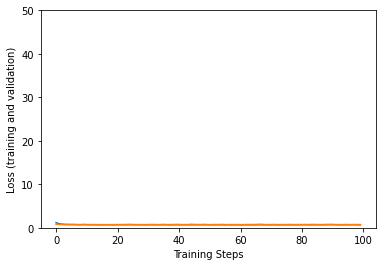

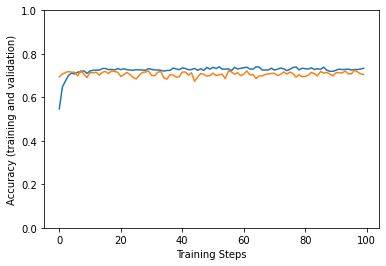

In [ ]:
# Plotting some graphs : these plots will help us know how well the training has been done.
# orange for validation, and blue is for training accuracy 

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [ ]:
# save trained model, and checking the performance of the model

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Attire' 'Decorationandsignage' 'Food' 'Misc']


Checking the performance of the model: shows how well the model trained by doing predictions.

In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 4)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Misc' 'Food' 'Food' 'Food' 'Decorationandsignage' 'Decorationandsignage'
 'Food' 'Attire' 'Misc' 'Attire' 'Decorationandsignage' 'Food' 'Misc'
 'Attire' 'Attire' 'Food' 'Misc' 'Attire' 'Food' 'Attire' 'Food' 'Attire'
 'Attire' 'Attire' 'Misc' 'Food' 'Attire' 'Food' 'Food' 'Food'
 'Decorationandsignage' 'Food']


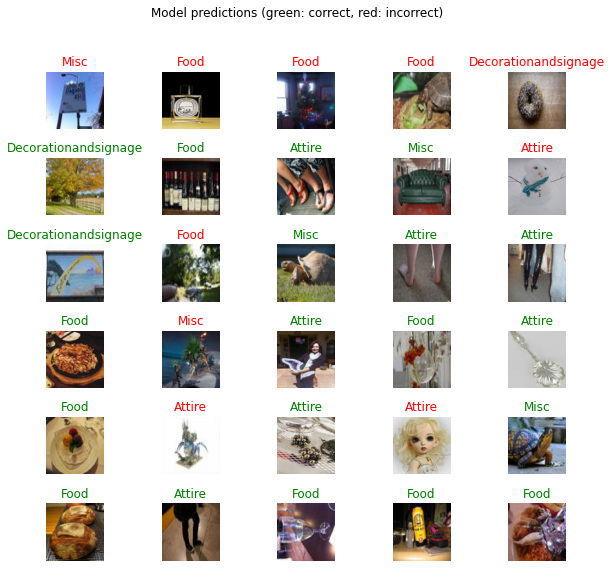

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")